In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

In [3]:
#Import csv
raw_game_data = pd.read_csv("vgsales-12-4-2019.csv")
raw_game_data.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [4]:
#Filter columns to only ones we need for analysis
base_game_df = raw_game_data.loc[:, ["Name", "Genre", "Platform", "Critic_Score", "Global_Sales", "NA_Sales",
                                     "PAL_Sales", "JP_Sales", "Other_Sales", "Year"]]

#Rename columns
base_game_df = base_game_df.rename(columns={"Critic_Score": "Critic Score", "Global_Sales": "Global Sales", "NA_Sales": "NA Sales",
                                           "PAL_Sales": "PAL Sales", "JP_Sales": "JP Sales", "Other_Sales": "Other Sales"})

base_game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
0,Wii Sports,Sports,Wii,7.7,NaN,NaN,NaN,NaN,NaN,2006.0
1,Super Mario Bros.,Platform,NES,10.0,NaN,NaN,NaN,NaN,NaN,1985.0
2,Mario Kart Wii,Racing,Wii,8.2,NaN,NaN,NaN,NaN,NaN,2008.0
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
4,Wii Sports Resort,Sports,Wii,8.0,NaN,NaN,NaN,NaN,NaN,2009.0
...,...,...,...,...,...,...,...,...,...,...
55787,Indivisible,Role-Playing,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,Lost Ember,Adventure,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,Lost Ember,Adventure,PS4,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55790,Lost Ember,Adventure,XOne,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [5]:
#Filter Year to 2009-2019
game_df = base_game_df[base_game_df["Year"] >= 2009]
game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
4,Wii Sports Resort,Sports,Wii,8.0,NaN,NaN,NaN,NaN,NaN,2009.0
8,New Super Mario Bros. Wii,Platform,Wii,8.6,NaN,NaN,NaN,NaN,NaN,2009.0
9,Minecraft,Misc,PC,10.0,NaN,NaN,NaN,NaN,NaN,2010.0
12,Kinect Adventures!,Party,X360,6.7,NaN,NaN,NaN,NaN,NaN,2010.0
...,...,...,...,...,...,...,...,...,...,...
55786,In the Valley of Gods,Adventure,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55787,Indivisible,Role-Playing,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,Lost Ember,Adventure,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,Lost Ember,Adventure,PS4,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [6]:
#RELATIONSHIP BETWEEN GLOBAL SALES AND CRITIC RATINGS

#Drop NaNs for Global Sales and Critic Scores
clean_game_df = game_df.dropna(subset=["Global Sales", "Critic Score"])

#Filter out any Global Sales that are "0"
clean_game_df = clean_game_df[clean_game_df["Global Sales"] > 0]
clean_game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
19,Grand Theft Auto V,Action,PS3,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
20,Grand Theft Auto V,Action,PS4,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
40,Call of Duty: Modern Warfare 3,Shooter,X360,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
41,Call of Duty: Black Ops,Shooter,X360,8.8,14.74,9.76,3.73,0.11,1.14,2010.0
45,Red Dead Redemption 2,Action-Adventure,PS4,9.8,13.94,5.26,6.21,0.21,2.26,2018.0
...,...,...,...,...,...,...,...,...,...,...
19607,Legend of Kay Anniversary,Action-Adventure,NS,6.5,0.01,NaN,0.01,NaN,0.00,2018.0
19668,Lionheart: Kings' Crusade,Strategy,PC,6.3,0.01,NaN,0.01,NaN,0.00,2010.0
19759,Buzz! Quiz World,Misc,PSP,5.9,0.01,NaN,0.00,NaN,0.00,2009.0
19768,Happy Birthdays,Misc,NS,8.5,0.01,0.01,NaN,NaN,0.00,2018.0


The r-squared is: 0.3228878247729108


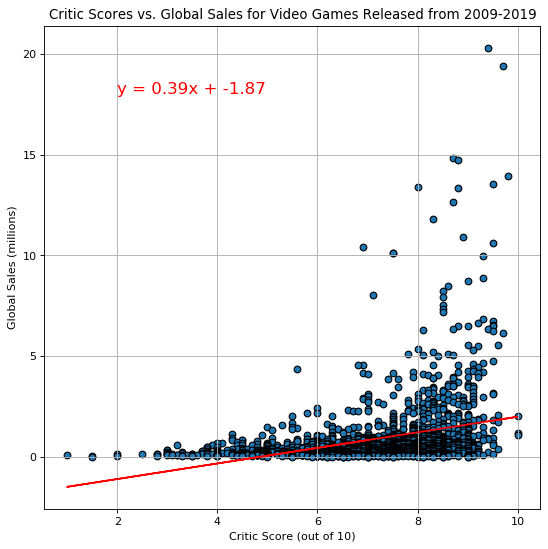

In [53]:
#Build scatter plot of Global Sales vs. Critic Score
x_values = clean_game_df["Critic Score"]
y_values = clean_game_df["Global Sales"]

# Perform a linear regression on temperature vs. latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Get regression values
regression_values = x_values * slope + intercept
    
# Create line equation string
line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
# Create Plot
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, regression_values, 'r-')
plt.annotate(line_equation, (2, 18), fontsize=15, color="red")

#Make plot pretty and readable
plt.title("Critic Scores vs. Global Sales for Video Games Released from 2009-2019")
plt.xlabel("Critic Score (out of 10)")
plt.ylabel("Global Sales (millions)")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue}")

#Save the plot
plt.savefig('../Project 1/global_sales_critic_ratings_scatter.png')

#Show the plot
plt.show()

In [8]:
#REGIONAL SALES FOR GENRES AND PLATFORMS

#Drop NaNs from regional sales data
region_game_df = game_df.dropna(subset=["NA Sales", "PAL Sales", "JP Sales", "Other Sales", "Critic Score"])
region_game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
19,Grand Theft Auto V,Action,PS3,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
20,Grand Theft Auto V,Action,PS4,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
40,Call of Duty: Modern Warfare 3,Shooter,X360,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
41,Call of Duty: Black Ops,Shooter,X360,8.8,14.74,9.76,3.73,0.11,1.14,2010.0
45,Red Dead Redemption 2,Action-Adventure,PS4,9.8,13.94,5.26,6.21,0.21,2.26,2018.0
...,...,...,...,...,...,...,...,...,...,...
13943,Sushi Striker: The Way of Sushido,Puzzle,NS,7.9,0.07,0.02,0.01,0.03,0.00,2018.0
14107,BlazBlue: Cross Tag Battle,Fighting,NS,8.0,0.07,0.04,0.01,0.01,0.01,2018.0
14170,RPG Maker: Fes,Role-Playing,3DS,7.0,0.07,0.03,0.00,0.02,0.00,2017.0
14601,Disgaea 1 Complete,Role-Playing,NS,8.0,0.06,0.03,0.01,0.01,0.00,2018.0


In [9]:
#REGIONAL SALES BY GENRE

#Group by Genres, account for multiple occurances of the same game
unique_name_df = region_game_df.groupby(['Name', 'Genre']).agg({'NA Sales': 'sum', 'PAL Sales': 'sum',
                                                               'JP Sales': 'sum', 'Other Sales': 'sum'})
unique_name_df

,,NA Sales,PAL Sales,JP Sales,Other Sales
Name,Genre,,,,
2010 FIFA World Cup South Africa,Sports,0.94,1.44,0.13,0.47
2014 FIFA World Cup Brazil,Sports,0.30,0.65,0.01,0.13
3D Dot Game Heroes,Role-Playing,0.36,0.12,0.03,0.07
50 Cent: Blood on the Sand,Shooter,0.22,0.13,0.01,0.05
7th Dragon III Code: VFD,Role-Playing,0.06,0.04,0.13,0.01
...,...,...,...,...,...
Yu-Gi-Oh! 5D's Tag Force 4,Strategy,0.19,0.07,0.12,0.05
Yu-Gi-Oh! 5D's World Championship 2010 Reverse of Arcadia,Strategy,0.18,0.02,0.09,0.02
ZombiU,Action,0.35,0.37,0.05,0.07


In [10]:
# Convert back to DataFrame
region_genre_df = pd.DataFrame(unique_name_df).reset_index(['Name', 'Genre'])
region_genre_df

,Name,Genre,NA Sales,PAL Sales,JP Sales,Other Sales
0,2010 FIFA World Cup South Africa,Sports,0.94,1.44,0.13,0.47
1,2014 FIFA World Cup Brazil,Sports,0.30,0.65,0.01,0.13
2,3D Dot Game Heroes,Role-Playing,0.36,0.12,0.03,0.07
3,50 Cent: Blood on the Sand,Shooter,0.22,0.13,0.01,0.05
4,7th Dragon III Code: VFD,Role-Playing,0.06,0.04,0.13,0.01
...,...,...,...,...,...,...
535,Yu-Gi-Oh! 5D's Tag Force 4,Strategy,0.19,0.07,0.12,0.05
536,Yu-Gi-Oh! 5D's World Championship 2010 Reverse...,Strategy,0.18,0.02,0.09,0.02
537,ZombiU,Action,0.35,0.37,0.05,0.07
538,inFAMOUS,Action,1.76,0.68,0.12,0.42


In [11]:
#Drop Name Column
region_genre_df = region_genre_df.drop('Name', axis=1)
region_genre_df

,Genre,NA Sales,PAL Sales,JP Sales,Other Sales
0,Sports,0.94,1.44,0.13,0.47
1,Sports,0.30,0.65,0.01,0.13
2,Role-Playing,0.36,0.12,0.03,0.07
3,Shooter,0.22,0.13,0.01,0.05
4,Role-Playing,0.06,0.04,0.13,0.01
...,...,...,...,...,...
535,Strategy,0.19,0.07,0.12,0.05
536,Strategy,0.18,0.02,0.09,0.02
537,Action,0.35,0.37,0.05,0.07
538,Action,1.76,0.68,0.12,0.42


In [12]:
#Group by Genre and get means for critic score and sums for regional sales
region_genre_df = region_genre_df.groupby(["Genre"])

sum_na_sales = region_genre_df["NA Sales"].sum()
sum_pal_sales = region_genre_df["PAL Sales"].sum()
sum_jp_sales = region_genre_df["JP Sales"].sum()
sum_other_sales = region_genre_df["Other Sales"].sum()

#Create dataframe to store genre regional sales and ratings data
genre_df = pd.DataFrame({
    "NA Sales": sum_na_sales,
    "PAL Sales": sum_pal_sales,
    "JP Sales": sum_jp_sales,
    "Other Sales": sum_other_sales
})

# Convert back to DataFrame
genre_df = pd.DataFrame(genre_df).reset_index(['Genre'])
genre_df

,Genre,NA Sales,PAL Sales,JP Sales,Other Sales
0,Action,100.81,82.55,19.07,28.97
1,Action-Adventure,25.81,28.53,2.71,9.67
2,Adventure,11.82,10.04,1.96,3.50
3,Board Game,0.06,0.22,0.01,0.02
4,Fighting,19.80,9.48,3.63,3.91
5,Misc,11.11,8.75,3.03,2.44
6,Music,2.74,0.83,0.06,0.43
7,Party,0.54,0.55,0.42,0.10
8,Platform,13.74,10.31,1.54,3.62
9,Puzzle,4.90,2.17,1.39,0.70


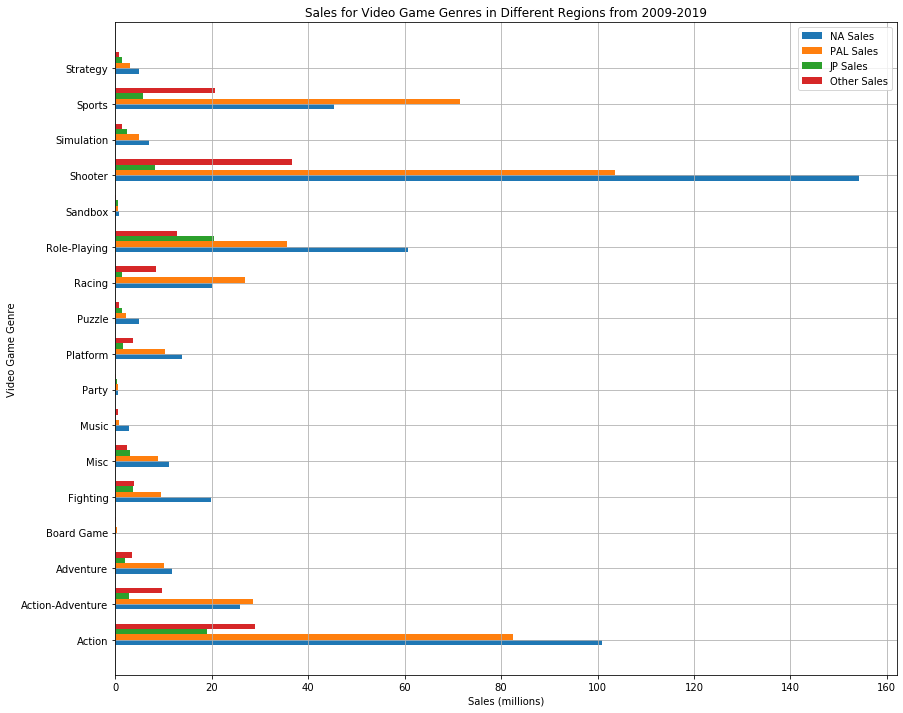

In [54]:
#Plot bar graph for Regional Sales vs. Genres

fig, ax = plt.subplots(figsize=(14, 12))

num_genres = len(genre_df["Genre"])
ind = np.arange(num_genres)
width = 0.15

p1 = ax.barh(ind, genre_df["NA Sales"], width)
p2 = ax.barh(ind + width, genre_df["PAL Sales"], width)
p3 = ax.barh(ind + width*2, genre_df["JP Sales"], width)
p4 = ax.barh(ind + width*3, genre_df["Other Sales"], width)

ax.set_title('Sales for Video Game Genres in Different Regions from 2009-2019')
ax.set_xlabel('Sales (millions)')
ax.set_ylabel('Video Game Genre')

ax.set_yticks(ind + width / 2)

ax.set_yticklabels(genre_df["Genre"])

plt.legend(['NA Sales', 'PAL Sales', 'JP Sales', 'Other Sales'], loc='upper right')
plt.grid()

#Save the plot
plt.savefig('../Project 1/regional_sales_genres_bar.png')

#Show the plot
plt.show()

In [14]:
#REGIONAL SALES FOR PLATFORMS

#Group by Platforms
region_platforms_df = region_game_df.groupby(['Platform'])

sum_na_sales = region_platforms_df["NA Sales"].sum()
sum_pal_sales = region_platforms_df["PAL Sales"].sum()
sum_jp_sales = region_platforms_df["JP Sales"].sum()
sum_other_sales = region_platforms_df["Other Sales"].sum()

#Create dataframe to store genre regional sales and ratings data
platforms_df = pd.DataFrame({
    "NA Sales": sum_na_sales,
    "PAL Sales": sum_pal_sales,
    "JP Sales": sum_jp_sales,
    "Other Sales": sum_other_sales
})

# Convert back to DataFrame
platforms_df = pd.DataFrame(platforms_df).reset_index(['Platform'])
platforms_df

,Platform,NA Sales,PAL Sales,JP Sales,Other Sales
0,3DS,14.94,9.64,11.61,2.31
1,DS,10.33,4.57,4.19,1.53
2,NS,13.58,10.54,4.24,2.30
3,PS2,0.45,0.56,0.69,1.45
4,PS3,143.11,140.54,25.47,52.52
5,PS4,69.24,104.15,10.52,33.43
6,PSN,0.43,0.91,0.31,1.16
7,PSP,6.61,7.46,6.05,4.30
8,PSV,0.53,0.71,0.13,0.25
9,Wii,19.55,11.91,3.84,3.32


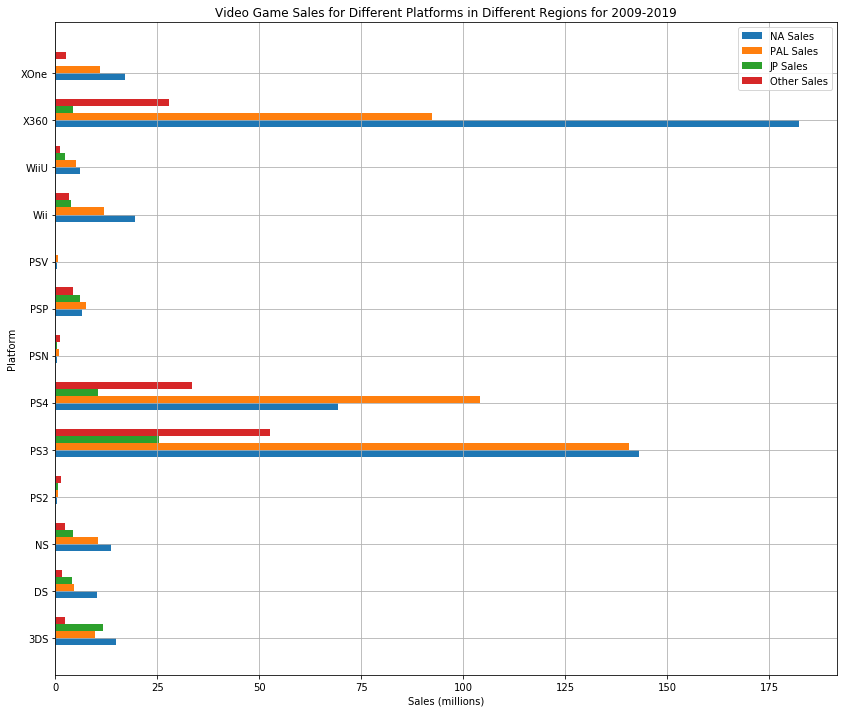

In [55]:
#Plot bar graph for Regional Sales vs. Platforms

fig, ax = plt.subplots(figsize=(14, 12))

num_platforms = len(platforms_df["Platform"])
ind = np.arange(num_platforms)
width = 0.15

p1 = ax.barh(ind, platforms_df["NA Sales"], width)
p2 = ax.barh(ind + width, platforms_df["PAL Sales"], width)
p3 = ax.barh(ind + width*2, platforms_df["JP Sales"], width)
p4 = ax.barh(ind + width*3, platforms_df["Other Sales"], width)

ax.set_title('Video Game Sales for Different Platforms in Different Regions for 2009-2019')
ax.set_xlabel('Sales (millions)')
ax.set_ylabel('Platform')

ax.set_yticks(ind + width / 2)

ax.set_yticklabels(platforms_df["Platform"])

plt.legend(['NA Sales', 'PAL Sales', 'JP Sales', 'Other Sales'], loc='upper right')
plt.grid()

#Save the plot
plt.savefig('../Project 1/regional_sales_platforms_bar.png')

#Show the plot
plt.show()

In [16]:
#GLOBAL SALES AND RATINGS FOR DIFFERENT DEVELOPERS

pub_dev_game_df = raw_game_data.loc[:, ["Name", "Genre", "Platform", "Publisher", "Developer", "Critic_Score", "Global_Sales",
                                        "Year"]]

#Rename columns
pub_dev_game_df = pub_dev_game_df.rename(columns={"Critic_Score": "Critic Score", "Global_Sales": "Global Sales"})

#Filter Year to 2009-2019
pub_dev_df = pub_dev_game_df[pub_dev_game_df["Year"] >= 2009]

#Drop NaNs for Global Sales and Critic Scores
pub_dev_df = pub_dev_df.dropna(subset=["Global Sales", "Critic Score"])

#Filter out any Global Sales that are "0"
pub_dev_df = pub_dev_df[pub_dev_df["Global Sales"] > 0]
pub_dev_df

,Name,Genre,Platform,Publisher,Developer,Critic Score,Global Sales,Year
19,Grand Theft Auto V,Action,PS3,Rockstar Games,Rockstar North,9.4,20.32,2013.0
20,Grand Theft Auto V,Action,PS4,Rockstar Games,Rockstar North,9.7,19.39,2014.0
40,Call of Duty: Modern Warfare 3,Shooter,X360,Activision,Infinity Ward,8.7,14.82,2011.0
41,Call of Duty: Black Ops,Shooter,X360,Activision,Treyarch,8.8,14.74,2010.0
45,Red Dead Redemption 2,Action-Adventure,PS4,Rockstar Games,Rockstar Games,9.8,13.94,2018.0
...,...,...,...,...,...,...,...,...
19607,Legend of Kay Anniversary,Action-Adventure,NS,THQ Nordic,THQ Nordic,6.5,0.01,2018.0
19668,Lionheart: Kings' Crusade,Strategy,PC,Paradox Interactive,Neocore Games,6.3,0.01,2010.0
19759,Buzz! Quiz World,Misc,PSP,Sony Computer Entertainment,Relentless Software,5.9,0.01,2009.0
19768,Happy Birthdays,Misc,NS,NIS America,Arc System Works,8.5,0.01,2018.0


In [17]:
#Group by Publisher and get means for critic score and sums for global sales
pub_df = pub_dev_df.groupby(["Publisher"])

mean_critic_score = pub_df["Critic Score"].mean()
sum_global_sales = pub_df["Global Sales"].sum()


#Create dataframe to store genre regional sales and ratings data
pub_df = pd.DataFrame({
    "Critic Score": mean_critic_score,
    "Global Sales": sum_global_sales
})

# Convert back to DataFrame
pub_df = pd.DataFrame(pub_df).reset_index(['Publisher'])
pub_df = pub_df.sort_values(by=["Global Sales"], ascending=False)

#Reset index
pub_df.reset_index(inplace = True, drop = True) 
pub_df

,Publisher,Critic Score,Global Sales
0,Activision,6.993750,210.45
1,Electronic Arts,7.446479,179.35
2,EA Sports,7.941584,165.99
3,Ubisoft,7.194483,150.52
4,Rockstar Games,9.225000,91.33
...,...,...,...
123,Excalibur Publishing,1.500000,0.01
124,Shin'en,8.100000,0.01
125,Rising Star,7.500000,0.01
126,Outright Games,6.500000,0.01


In [18]:
#Take the top 20 publishers
top20_pub_df = pub_df.iloc[0:20, :]
top20_pub_df

,Publisher,Critic Score,Global Sales
0,Activision,6.993750,210.45
1,Electronic Arts,7.446479,179.35
2,EA Sports,7.941584,165.99
3,Ubisoft,7.194483,150.52
4,Rockstar Games,9.225000,91.33
5,Sony Computer Entertainment,7.533333,79.17
6,Bethesda Softworks,7.276471,62.14
7,Nintendo,7.340816,56.91
8,Sega,6.784615,49.90
9,Square Enix,7.435185,47.12


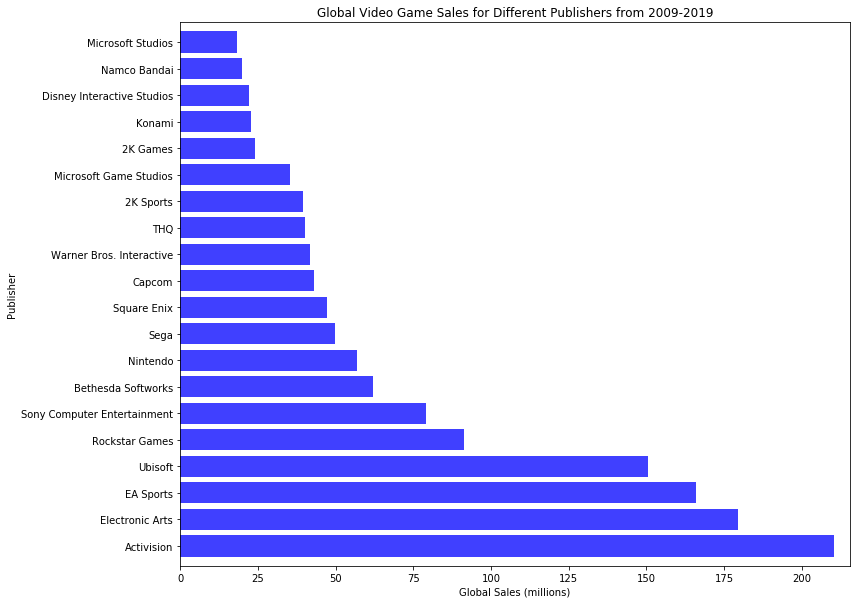

In [56]:
#Plot Global Sales for different Publishers

x_axis = np.arange(0, len(top20_pub_df["Publisher"]))
tick_locations = [x for x in x_axis]

plt.figure(figsize=(12,10))
plt.title("Global Video Game Sales for Different Publishers from 2009-2019")
plt.ylabel("Publisher")
plt.xlabel("Global Sales (millions)")

plt.ylim(-0.75, len(top20_pub_df["Publisher"])-0.25)
plt.xlim(0, max(top20_pub_df["Global Sales"])+5)

plt.barh(x_axis, top20_pub_df["Global Sales"], facecolor="b", alpha=0.75, align="center")
plt.yticks(tick_locations, top20_pub_df["Publisher"])

#Save the plot
plt.savefig('../Project 1/global_sales_publishers_bar.png')

#Show the plot
plt.show()

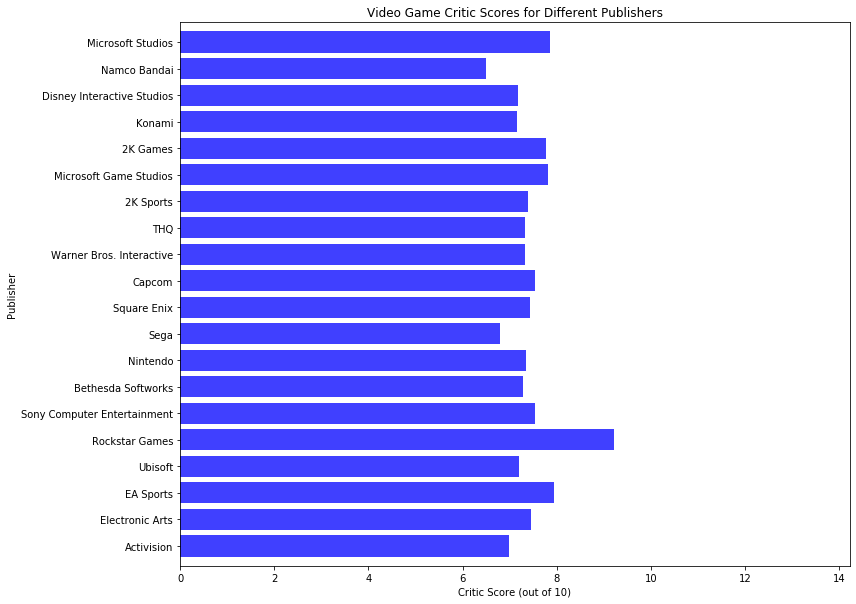

In [57]:
#Plot Critic Scores for different Publishers

x_axis = np.arange(0, len(top20_pub_df["Publisher"]))
tick_locations = [x for x in x_axis]

plt.figure(figsize=(12,10))
plt.title("Video Game Critic Scores for Different Publishers")
plt.ylabel("Publisher")
plt.xlabel("Critic Score (out of 10)")

plt.ylim(-0.75, len(top20_pub_df["Publisher"])-0.25)
plt.xlim(0, max(top20_pub_df["Critic Score"])+5)

plt.barh(x_axis, top20_pub_df["Critic Score"], facecolor="b", alpha=0.75, align="center")
plt.yticks(tick_locations, top20_pub_df["Publisher"])

#Save the plot
plt.savefig('../Project 1/critic_scores_publisher_bar.png')

#Show the plot
plt.show()

In [27]:
#NUMBER OF GAMES RELEASED PER PUBLISHER

#Use cleaned data set from global sales and ratings for publishers
#Remove deuplicates of games by name (for the same name released on different platforms)
pub_dev_unique_df = pub_dev_df.drop_duplicates(subset="Name")

#Group by Publisher
pub_dev_unique_df = pub_dev_unique_df.groupby(["Publisher"])

#Get number of games released
num_games = pub_dev_unique_df["Name"].count()

#Create dataframe to store genre regional sales and ratings data
num_games_df = pd.DataFrame({
    "Number of Games Released": num_games
})

# Convert back to DataFrame
num_games_df = pd.DataFrame(num_games_df).reset_index(['Publisher'])
num_games_df = num_games_df.sort_values(by=["Number of Games Released"], ascending=False)

#Reset index
num_games_df.reset_index(inplace = True, drop = True) 

#Take the top 20 publishers
top20_num_games_df = num_games_df.iloc[0:20, :]
top20_num_games_df

,Publisher,Number of Games Released
0,Nintendo,93
1,Ubisoft,83
2,Electronic Arts,71
3,Sony Computer Entertainment,59
4,Sega,55
5,Activision,51
6,Atlus,41
7,Square Enix,39
8,EA Sports,38
9,Capcom,37


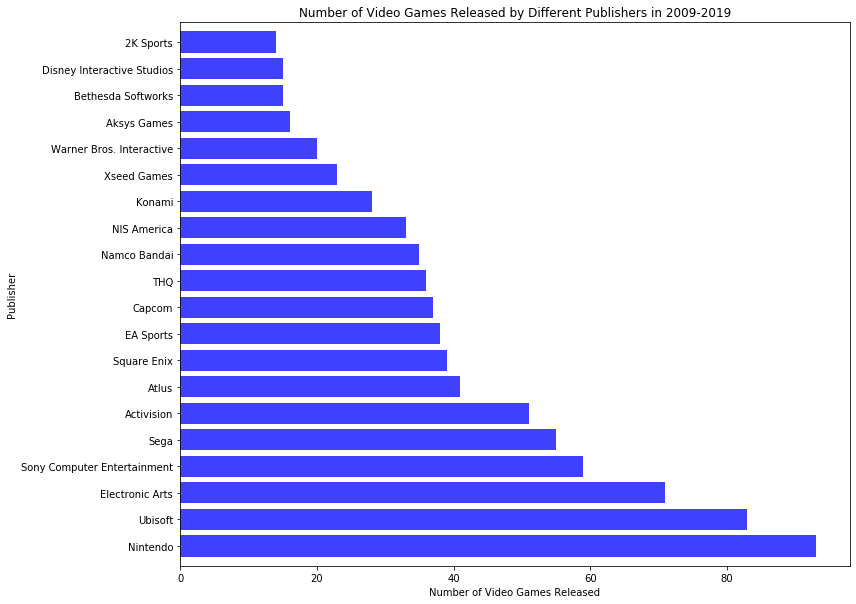

In [58]:
#Plot Number of Games Released for different Publishers

x_axis = np.arange(0, len(top20_num_games_df["Publisher"]))
tick_locations = [x for x in x_axis]

plt.figure(figsize=(12,10))
plt.title("Number of Video Games Released by Different Publishers in 2009-2019")
plt.ylabel("Publisher")
plt.xlabel("Number of Video Games Released")

plt.ylim(-0.75, len(top20_num_games_df["Publisher"])-0.25)
plt.xlim(0, max(top20_num_games_df["Number of Games Released"])+5)

plt.barh(x_axis, top20_num_games_df["Number of Games Released"], facecolor="b", alpha=0.75, align="center")
plt.yticks(tick_locations, top20_num_games_df["Publisher"])

#Save the plot
plt.savefig('../Project 1/num_games_publisher_bar.png')

#Show the plot
plt.show()